<a href="https://colab.research.google.com/github/swapnilprakashpatil/aai501_6proj/blob/Maurin/Italy_prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [ ]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [ ]:
# select the top 5 countries that we are interested in
# Filter rows for each country and run model
#This notebook is for Italy
Italy_df = df2[df2['Country'] == 'Italy']

print(Italy_df)

     Country  Year  Expenditure_Constant_2022
2071   Italy  2000                34238.35046
2072   Italy  2001                33676.08598
2073   Italy  2002                34596.53218
2074   Italy  2003                34877.89251
2075   Italy  2004                34992.13646
2076   Italy  2005                33665.35376
2077   Italy  2006                32574.67448
2078   Italy  2007                31645.21777
2079   Italy  2008                32955.39163
2080   Italy  2009                31875.22255
2081   Italy  2010                30965.01173
2082   Italy  2011                30323.86819
2083   Italy  2012                28030.19763
2084   Italy  2013                26956.79341
2085   Italy  2014                24885.32809
2086   Italy  2015                23828.84030
2087   Italy  2016                26994.18175
2088   Italy  2017                27769.83555
2089   Italy  2018                28047.33674
2090   Italy  2019                27280.52948
2091   Italy  2020                

In [ ]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
Italy_df2= Italy_df[['Year', 'Expenditure_Constant_2022']]


# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
Italy_df2 = Italy_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
Italy_df2['ds'] = to_datetime(Italy_df2['ds'], format='%Y')

# Fit the model by instantiating a new Prophet object and disable irrelevant seasonality
model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False)

# Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds
model.fit(Italy_df2)

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/zdrmjptq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/3stz40t2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47965', 'data', 'file=/tmp/tmpkc482for/zdrmjptq.json', 'init=/tmp/tmpkc482for/3stz40t2.json', 'output', 'file=/tmp/tmpkc482for/prophet_modelon3l6rmj/prophet_model-20241206012111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Simulate the trend of expenditures for this country to 2030
future = model.make_future_dataframe(periods=8, freq = "YE", include_history= True)

#Make predictions on the future dataframe
forecast = model.predict(future) #This line is added to predict values and store them in forecast dataframe

#View predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2000-01-01  33242.106560  29121.400671  37344.793770
1  2001-01-01  33141.892104  29128.489684  37028.049377
2  2002-01-01  32783.735574  28797.734129  36749.999643
3  2003-01-01  32569.260564  28575.517298  36679.847876
4  2004-01-01  32498.518408  28569.606087  36679.744744
5  2005-01-01  32398.303954  28367.417401  36413.754342
6  2006-01-01  32040.147425  27833.049258  36283.039911
7  2007-01-01  31825.672414  27774.201135  35985.640503
8  2008-01-01  31754.930256  27586.089308  35545.834049
9  2009-01-01  31654.715814  27408.540061  35599.991868
10 2010-01-01  31296.559297  27209.358652  35040.464847
11 2011-01-01  31082.084329  27243.534554  34903.783051
12 2012-01-01  31011.356145  26616.749756  34768.964437
13 2013-01-01  30911.157488  26910.885697  34742.394899
14 2014-01-01  30553.435002  26689.559772  34488.668927
15 2015-01-01  30339.979663  26126.889502  34456.387616
16 2016-01-01  30270.666708  25968.090822  34115

Text(0.5, 1.0, 'Italy Military Spending Past and Predicted')

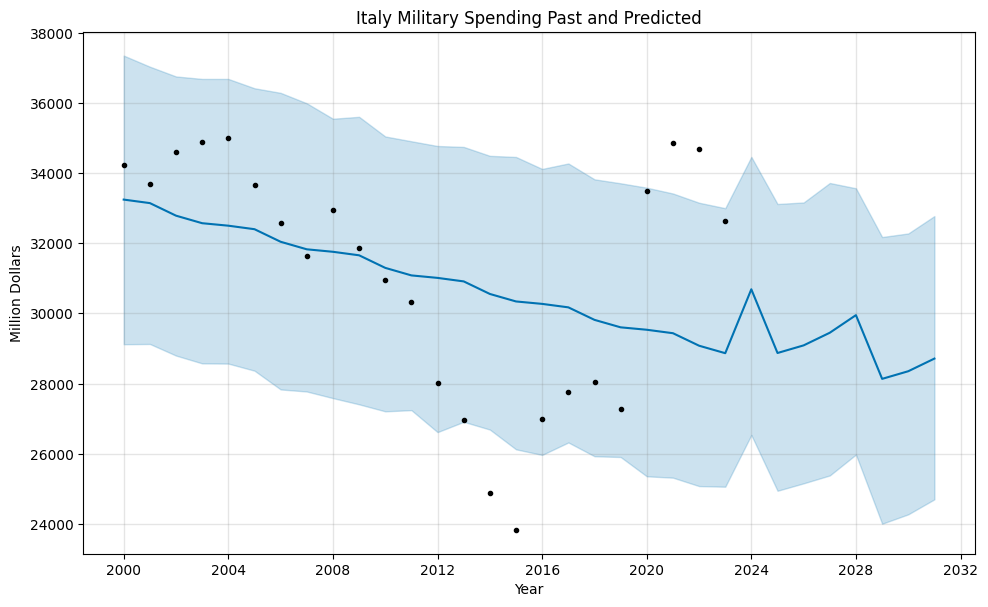

In [ ]:
fig1 = model.plot(forecast, xlabel= "Year", ylabel= "Million Dollars")
fig1.gca().set_title("Italy Military Spending Past and Predicted") # Set the title using the axes object

In [ ]:
#Evaluate the Prophet model using training and testing data sets

#split the data by a cut-off date of 2015 for training
cutoff_date = '2015-01-01'
train = Italy_df2[Italy_df2['ds'] < cutoff_date]
test = Italy_df2[Italy_df2['ds'] >= cutoff_date]


In [ ]:
#Fit the Prophet model on the training dataset
model_2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False) #add regressors if needed
model_2.fit(train[['ds', 'y']])


INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/u_unr1an.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/oa91mtld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=444', 'data', 'file=/tmp/tmpkc482for/u_unr1an.json', 'init=/tmp/tmpkc482for/oa91mtld.json', 'output', 'file=/tmp/tmpkc482for/prophet_modeler14hnhc/prophet_model-20241206012159.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forecast on the Test Period

#create a future dataframe and generate future dates that match the test period
# Make predictions on the test period; named forecast_2 to keep separate from
# Prophet simulation above
forecast_2 = model_2.predict(test[['ds']]) #This line is added to predict values and store them in forecast dataframe

In [ ]:
#Evaluate the Model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_2['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

#Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_2['yhat']))
print(f"Root Mean Squared Error (MSE): {rmse}")

#Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['y'], forecast_2['yhat']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 10258.680223014988
Root Mean Squared Error (MSE): 12088.185140711776
Mean Absolute Percentage Error (MAPE): 32.12%


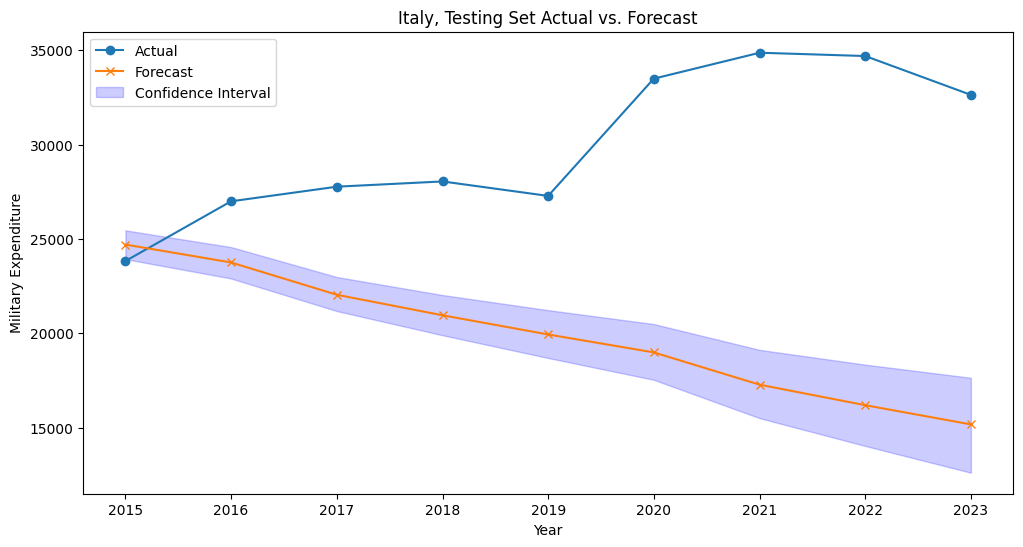

In [ ]:
#Visualize Results of Training and Testing

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker = 'o')
plt.plot(forecast_2['ds'], forecast_2['yhat'], label='Forecast', marker = 'x')
plt.fill_between(
    forecast_2['ds'],
    forecast_2['yhat_lower'],
    forecast_2['yhat_upper'],
    color='blue', alpha=0.2, label='Confidence Interval'
)
plt.xlabel('Year')
plt.ylabel('Military Expenditure')
plt.title('Italy, Testing Set Actual vs. Forecast')
plt.legend()
plt.show()


In [ ]:
#evaluate the Prophet model using cross-validation function
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '5110 days', period = '365 days', horizon = '365 days',)


INFO:prophet:Making 9 forecasts with cutoffs between 2014-01-03 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/j3u2r1jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/519m6axw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55248', 'data', 'file=/tmp/tmpkc482for/j3u2r1jy.json', 'init=/tmp/tmpkc482for/519m6axw.json', 'output', 'file=/tmp/tmpkc482for/prophet_modelm0ylryxy/prophet_model-20241206012226.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkc482for/cr7mkduw.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
#show forcasts
#:There are 9 forecasts with cutoffs between 2014-01-03 and 2022-01-01
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,24703.492170,23935.722289,25465.085597,23828.84030,2014-01-03
1,2016-01-01,22975.739151,22327.688424,23595.060702,26994.18175,2015-01-03
2,2017-01-01,23950.308410,22491.790679,25394.758073,27769.83555,2016-01-03
3,2018-01-01,24902.025461,23129.386681,26537.568550,28047.33674,2017-01-02
4,2019-01-01,25020.432582,23058.198521,27034.624397,27280.52948,2018-01-02
5,2020-01-01,25068.929958,23046.584261,27027.965909,33492.26904,2019-01-02
6,2021-01-01,25535.784297,22715.044964,28244.418642,34867.44847,2020-01-02
7,2022-01-01,27042.367534,23459.100248,30736.383665,34691.88116,2021-01-01
8,2023-01-01,28069.668043,24170.936916,32153.380385,32634.77375,2022-01-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = .5)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,364 days,2.513561e+07,5013.542906,4412.068600,0.146008,0.124843,0.160152,0.0
1,365 days,4.789270e+07,6920.455504,6489.588026,0.193506,0.236000,0.216839,0.0


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


Figure(1000x600)


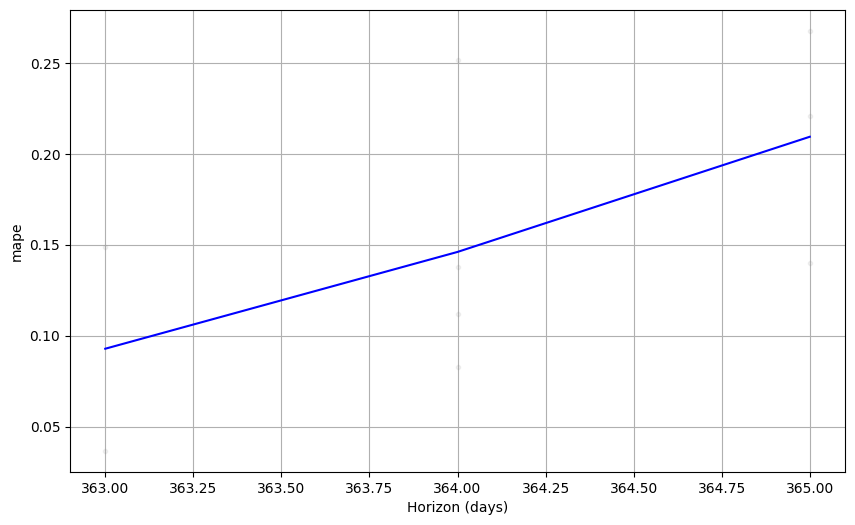

In [ ]:
#Visualize how the forcasting model performed
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
print(fig3)

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.